In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Boston_Listings_Reviews=pd.read_csv("Output/Boston_Listings_Reviews_df.csv")

In [4]:
Seattle_Listings_Reviews=pd.read_csv("Output/Seattle_Listings_Reviews_df.csv")
Boston_Listings_Reviews.head()

,Unnamed: 0,listing_id,name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,City
0,1,3075044,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2,1.0,1.0,1.0,94.0,Boston
1,2,6976,Mexican Folk Art Haven in Boston,42.292438,-71.135765,Apartment,2,1.0,1.0,1.0,98.0,Boston
2,3,1436513,Spacious Sunny Bedroom Suite in Historic Home,42.281106,-71.121021,House,4,1.0,1.0,2.0,100.0,Boston
3,4,7651065,Come Home to Boston,42.284512,-71.136258,House,2,1.5,1.0,2.0,99.0,Boston
4,5,12386020,Private Bedroom + Great Coffee,42.291690,-71.131893,Condominium,2,1.0,1.0,1.0,100.0,Boston


In [5]:
bins=np.arange(0,101,5)
Boston_Listings_Reviews['Rating_Range']=pd.cut(Boston_Listings_Reviews.review_scores_rating,bins)
Seattle_Listings_Reviews['Rating_Range']=pd.cut(Seattle_Listings_Reviews.review_scores_rating,bins)

In [89]:
Boston_groupby_property_type=Boston_Listings_Reviews.groupby('Rating_Range')
df1=Boston_groupby_property_type["listing_id"].count()

Seattle_groupby_property_type=Seattle_Listings_Reviews.groupby('Rating_Range')
df2=Seattle_groupby_property_type["listing_id"].count()

df1=df1.reset_index()
df1.columns=['Rating_Range','Boston_Rating_Count']

df2=df2.reset_index()
df2.columns=['Rating_Range','Seattle_Rating_Count']

Rating_count=df1.merge(df2, on ='Rating_Range', how='inner')[10:20]
total_Boston_rating_count=sum(Rating_count["Boston_Rating_Count"])
total_Seattle_rating_count=sum(Rating_count["Seattle_Rating_Count"])

Rating_count["Boston_rating_percentage"]=[round(i/total_Boston_rating_count*100,0) for i in Rating_count["Boston_Rating_Count"]]
Rating_count["Seattle_rating_percentage"]=[round(i/total_Seattle_rating_count*100,0) for i in Rating_count["Seattle_Rating_Count"]]

new_df1=Rating_count[6:10][["Rating_Range","Boston_rating_percentage","Seattle_rating_percentage"]]
new_df2=pd.DataFrame([["Other",Rating_count[0:5]["Boston_rating_percentage"].sum(),Rating_count[0:5]["Boston_rating_percentage"].sum()]], columns=new_df1.columns)
new_df=new_df1.append(new_df2)
new_df

,Rating_Range,Boston_rating_percentage,Seattle_rating_percentage
16,"(80, 85]",5.0,2.0
17,"(85, 90]",15.0,10.0
18,"(90, 95]",25.0,27.0
19,"(95, 100]",44.0,56.0
0,Other,3.0,3.0


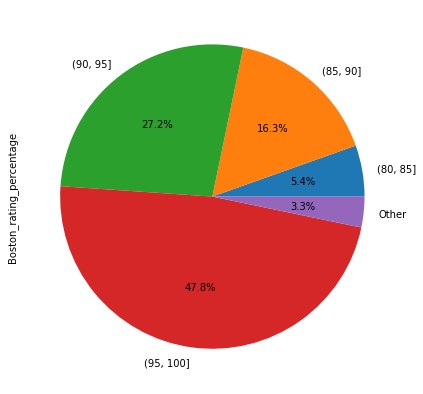

In [121]:
ax1 = plt.subplot(121, aspect='equal')
new_df.plot(kind='pie', y = 'Boston_rating_percentage', ax=ax1,autopct='%1.1f%%', shadow=False, labels=new_df["Rating_Range"], legend = False, fontsize=10, figsize=(15,15))
ax1.figure.savefig("Output/Boston_by_Rating_Pie.png")
plt.show()

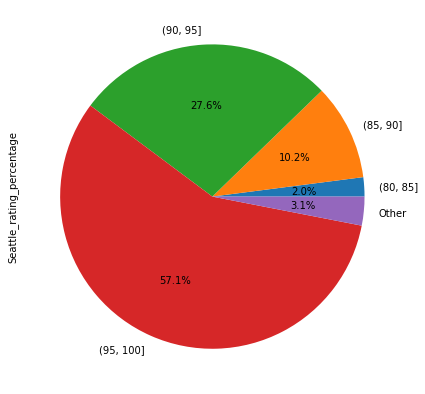

In [120]:
ax2 = plt.subplot(121, aspect='equal')
new_df.plot(kind='pie', y = 'Seattle_rating_percentage', ax=ax2,autopct='%1.1f%%', shadow=False, labels=new_df["Rating_Range"], legend = False, fontsize=10, figsize=(15,15))
ax2.figure.savefig("Output/Seattle_by_Rating_Pie.png")
plt.show()